ch7

판다스를 이용한 결측값 처리

시리즈 결측값 처리

In [ ]:
import pandas as pd

In [ ]:
score = pd.Series([30,20,40,pd.NA,30,pd.NA])
score

,0
0,30
1,20
2,40
3,<NA>
4,30
5,<NA>


In [ ]:
score.sum()

120

In [ ]:
score.mean()

np.float64(30.0)

In [ ]:
score+5

,0
0,35
1,25
2,45
3,<NA>
4,35
5,<NA>


In [ ]:
pd.isna(score)

,0
0,False
1,False
2,False
3,True
4,False
5,True


In [ ]:
pd.isna(score).sum()

np.int64(2)

In [ ]:
score.size

6

In [ ]:
score.count()

np.int64(4)

In [ ]:
pd.notna(score)

,0
0,True
1,True
2,True
3,False
4,True
5,False


In [ ]:
pd.notna(score).sum()

np.int64(4)

In [ ]:
score = score.dropna()
score

,0
0,30
1,20
2,40
4,30


In [ ]:
score = score.reset_index(drop=True)
score

,0
0,30
1,20
2,40
3,30


데이터프레임 결측값 처리

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/iris.csv")
df.iloc[0,1]=pd.NA ; df.iloc[0,2]=pd.NA
df.iloc[1,2]=np.nan ; df.iloc[2,3]=None
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,NaN,NaN,0.2,setosa
1,4.9,3.0,NaN,0.2,setosa
2,4.7,3.2,1.3,NaN,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.isnull().sum()

,0
Sepal_Length,0
Sepal_Width,1
Petal_Length,2
Petal_Width,1
Species,0


In [ ]:
df.isnull().sum(axis=1)

,0
0,2
1,1
2,1
3,0
4,0
...,...
145,0
146,0
147,0
148,0


In [ ]:
df.loc[df.isnull().sum(axis=1)>0, :]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,NaN,NaN,0.2,setosa
1,4.9,3.0,NaN,0.2,setosa
2,4.7,3.2,1.3,NaN,setosa


In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,4.6,3.1,1.5,0.2,setosa
1,5.0,3.6,1.4,0.2,setosa
2,5.4,3.9,1.7,0.4,setosa
3,4.6,3.4,1.4,0.3,setosa
4,5.0,3.4,1.5,0.2,setosa


결측값 추정
 - 결측값이 있는 칼럼의 값을 추정하여 결측값 예측


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_org = pd.read_csv("/content/iris.csv")
df_miss = df_org.copy()

In [ ]:
#결측값 생성
df_miss.iloc[0, 3] = pd.NA ; df_miss.iloc[0, 2] = pd.NA
df_miss.iloc[1, 2] = None ; df_miss.iloc[2, 3] = None
df_miss.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,NaN,NaN,setosa
1,4.9,3.0,NaN,0.2,setosa
2,4.7,3.2,1.3,NaN,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_miss.iloc[:, :4])
df_scaled[0:5, :]

array([[0.22222222, 0.625     ,        nan,        nan],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [ ]:
imputer = KNNImputer(n_neighbors=5)
df_scaled = imputer.fit_transform(df_scaled)
df_scaled[0:5, :]

array([[0.22222222, 0.625     , 0.0779661 , 0.09166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [ ]:
df_filled = scaler.inverse_transform(df_scaled)
df_filled[0:5, :]

array([[5.1 , 3.5 , 1.46, 0.32],
       [4.9 , 3.  , 1.4 , 0.2 ],
       [4.7 , 3.2 , 1.3 , 0.2 ],
       [4.6 , 3.1 , 1.5 , 0.2 ],
       [5.  , 3.6 , 1.4 , 0.2 ]])

In [ ]:
df_miss.iloc[:,:4] = df_filled

In [ ]:
df_miss.head(4)
df_org.head(4)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


특잇값 추출 및 제거

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

In [ ]:
df = pd.read_csv('/content/iris.csv')
sw = df.Sepal_Width

In [ ]:
z = np.abs(stats.zscore(sw))
outliers = sw[z > 2]
print(outliers)

14    4.0
15    4.4
32    4.1
33    4.2
60    2.0
Name: Sepal_Width, dtype: float64


In [ ]:
Q1 = sw.quantile(0.25)
Q3 = sw.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
outliers = sw[(sw < Q1 - IQR*1.5) | (sw > Q3 + IQR*1.5)]
print(outliers)

15    4.4
32    4.1
33    4.2
60    2.0
Name: Sepal_Width, dtype: float64


In [ ]:
clean = sw.loc[~sw.isin(outliers)]
len(clean)

146

정렬

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/iris.csv')

In [ ]:
df_sorted = df.sort_values('Sepal_Length')
df_sorted.head(10)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
13,4.3,3.0,1.1,0.1,setosa
8,4.4,2.9,1.4,0.2,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
22,4.6,3.6,1.0,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
47,4.6,3.2,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [ ]:
df_sorted = df.sort_values('Sepal_Length', ascending=False)
df_sorted.head(10)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
131,7.9,3.8,6.4,2.0,virginica
122,7.7,2.8,6.7,2.0,virginica
118,7.7,2.6,6.9,2.3,virginica
117,7.7,3.8,6.7,2.2,virginica
135,7.7,3.0,6.1,2.3,virginica
105,7.6,3.0,6.6,2.1,virginica
130,7.4,2.8,6.1,1.9,virginica
107,7.3,2.9,6.3,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica
129,7.2,3.0,5.8,1.6,virginica


In [ ]:
df_sorted = df.sort_values(['Species', 'Sepal_Width'])
df_sorted.head(10)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
41,4.5,2.3,1.3,0.3,setosa
8,4.4,2.9,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
12,4.8,3.0,1.4,0.1,setosa
13,4.3,3.0,1.1,0.1,setosa
25,5.0,3.0,1.6,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
45,4.8,3.0,1.4,0.3,setosa
3,4.6,3.1,1.5,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


데이터셋의 순위 확인

In [ ]:
import pandas as pd

In [ ]:
df['Petal_Length'].rank().astype(int)

,Petal_Length
0,18
1,18
2,8
3,31
4,18
...,...
145,117
146,106
147,117
148,121


In [ ]:
df['Petal_Length'].rank(ascending = False).astype(int)

,Petal_Length
0,133
1,133
2,143
3,120
4,133
...,...
145,33
146,44
147,33
148,29


데이터 샘플링 및 조합

In [ ]:
import pandas as pd
import itertools

In [ ]:
df = pd.read_csv('/content/iris.csv')

In [ ]:
# 임의 샘플링
df20 = df.sample(n=20, random_state=123)
df20

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
72,6.3,2.5,4.9,1.5,versicolor
112,6.8,3.0,5.5,2.1,virginica
132,6.4,2.8,5.6,2.2,virginica
88,5.6,3.0,4.1,1.3,versicolor
37,4.9,3.6,1.4,0.1,setosa
138,6.0,3.0,4.8,1.8,virginica
87,6.3,2.3,4.4,1.3,versicolor
42,4.4,3.2,1.3,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
90,5.5,2.6,4.4,1.2,versicolor


In [ ]:
# 층화 샘플링
stratified = df.groupby('Species').apply(
    lambda x: x.sample(frac=0.2, random_state=123)
)
stratified

<ipython-input-76-1d228bd763ff>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified = df.groupby('Species').apply(


Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  \
Species                                                                
setosa     10            5.4          3.7           1.5          0.2   
           13            4.3          3.0           1.1          0.1   
           30            4.8          3.1           1.6          0.2   
           46            5.1          3.8           1.6          0.2   
           18            5.7          3.8           1.7          0.3   
           0             5.1          3.5           1.4          0.2   
           40            5.0          3.5           1.3          0.3   
           12            4.8          3.0           1.4          0.1   
           29            4.7          3.2           1.6          0.2   
           8             4.4          2.9           1.4          0.2   
versicolor 60            5.0          2.0           3.5          1.0   
           63            6.1          2.9           4.7          1.4   
           80            5.5          2.4           3.8          1.1   
           96            5.7          2.9           4.2          1.3   
           68            6.2          2.2           4.5          1.5   
           50            7.0          3.2           4.7          1.4   
           90            5.5          2.6           4.4          1.2   
           62            6.0          2.2           4.0          1.0   
           79            5.7          2.6           3.5          1.0   
           58            6.6          2.9           4.6          1.3   
virginica  110           6.5          3.2           5.1          2.0   
           113           5.7          2.5           5.0          2.0   
           130           7.4          2.8           6.1          1.9   
           146           6.3          2.5           5.0          1.9   
           118           7.7          2.6           6.9          2.3   
           100           6.3          3.3           6.0          2.5   
           140           6.7          3.1           5.6          2.4   
           112           6.8          3.0           5.5          2.1   
           129           7.2          3.0           5.8          1.6   
           108           6.7          2.5           5.8          1.8   

                   Species  
Species                     
setosa     10       setosa  
           13       setosa  
           30       setosa  
           46       setosa  
           18       setosa  
           0        setosa  
           40       setosa  
           12       setosa  
           29       setosa  
           8        setosa  
versicolor 60   versicolor  
           63   versicolor  
           80   versicolor  
           96   versicolor  
           68   versicolor  
           50   versicolor  
           90   versicolor  
           62   versicolor  
           79   versicolor  
           58   versicolor  
virginica  110   virginica  
           113   virginica  
           130   virginica  
           146   virginica  
           118   virginica  
           100   virginica  
           140   virginica  
           112   virginica  
           129   virginica  
           108   virginica

In [ ]:
# 조합
species = df.Species.unique()

In [ ]:
comb = list(itertools.combinations(species, 2))
comb

[('setosa', 'versicolor'),
 ('setosa', 'virginica'),
 ('versicolor', 'virginica')]

iris 데이터셋에서 각 변수의 품종별 평균 및 표준편차 출력하기

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/iris.csv')

In [ ]:
df_agg = df.groupby('Species').mean()  # 평균
df_agg

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [ ]:
df_agg = df.groupby('Species').std()  # 표준편차
df_agg

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


각 변수의 최댓값 출력

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/mtcars.csv')

In [ ]:
df_agg = df.groupby(['cyl','vs']).max()
df_agg

model   mpg   disp   hp  drat     wt   qsec  am  gear  carb
cyl vs                                                                        
4   0      Porsche 914-2  26.0  120.3   91  4.43  2.140  16.70   1     5     2
    1         Volvo 142E  33.9  146.7  113  4.93  3.190  22.90   1     5     2
6   0      Mazda RX4 Wag  21.0  160.0  175  3.90  2.875  17.02   1     5     6
    1            Valiant  21.4  258.0  123  3.92  3.460  20.22   0     4     4
8   0   Pontiac Firebird  19.2  472.0  335  4.22  5.424  18.00   1     5     8

데이터 병합

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.DataFrame([[169, 58, 1.0],
                    [172, 73, 1.2],
                    [184, 82, 0.7]],
                   columns=['height', 'weight', 'eye'])
df1

,height,weight,eye
0,169,58,1.0
1,172,73,1.2
2,184,82,0.7


In [ ]:
df2 = pd.DataFrame([[176, 71, 0.8, 'M'],
                    [169, 62, 0.7, 'F'],
                    [158, 60, 1.3, 'M']],
                   columns=['height', 'weight', 'eye', 'gender'])
df2

,height,weight,eye,gender
0,176,71,0.8,M
1,169,62,0.7,F
2,158,60,1.3,M


In [ ]:
df3 = pd.DataFrame([[3, 22],
                    [2, 21]],
                   columns=['grade', 'age'])
df3

,grade,age
0,3,22
1,2,21


In [ ]:
df12 = pd.concat([df1, df2])
df12

,height,weight,eye,gender
0,169,58,1.0,NaN
1,172,73,1.2,NaN
2,184,82,0.7,NaN
0,176,71,0.8,M
1,169,62,0.7,F
2,158,60,1.3,M


In [ ]:
df12 = df12.reset_index(drop=True)
df12

,height,weight,eye,gender
0,169,58,1.0,NaN
1,172,73,1.2,NaN
2,184,82,0.7,NaN
3,176,71,0.8,M
4,169,62,0.7,F
5,158,60,1.3,M


In [ ]:
df13 = pd.concat([df1, df3], axis=1)
df13

,height,weight,eye,grade,age
0,169,58,1.0,3.0,22.0
1,172,73,1.2,2.0,21.0
2,184,82,0.7,NaN,NaN


In [ ]:
import pandas as pd

In [ ]:
df1 = pd.DataFrame([['a', 90], ['b', 80], ['c', 40]],
                   columns=['name', 'kor'])
df1

,name,kor
0,a,90
1,b,80
2,c,40


In [ ]:
df2 = pd.DataFrame([['a', 75], ['b', 60], ['d', 90]],
                   columns=['name', 'math'])
df2

,name,math
0,a,75
1,b,60
2,d,90


In [ ]:
df12 = df1.merge(df2, on='name')
df12

,name,kor,math
0,a,90,75
1,b,80,60


In [ ]:
df12 = df1.merge(df2, how='right', on='name')
df12

,name,kor,math
0,a,90.0,75
1,b,80.0,60
2,d,NaN,90


In [ ]:
df12 = df1.merge(df2, how='outer', on='name')
df12

,name,kor,math
0,a,90.0,75.0
1,b,80.0,60.0
2,c,40.0,NaN
3,d,NaN,90.0


피벗테이블
 ; 많은 양의 데이터에서 필요한 자료만 뽑아 새롭게 집계된 표를 작성해주는 기능

In [ ]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
p1 = df.pivot_table(index='sex',
                    columns='day',
                    values='total_bill',
                    aggfunc='mean'
                    )
p1.head()

<ipython-input-103-6aef68904101>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  p1 = df.pivot_table(index='sex',


day,Thur,Fri,Sat,Sun
sex,,,,
Male,18.714667,19.857000,20.802542,21.887241
Female,16.715312,14.145556,19.680357,19.872222


In [ ]:
p2 = df.pivot_table(index='sex',
                    columns='time',
                    values='total_bill',
                    aggfunc='mean'
                    )
p2.head()

<ipython-input-104-8ff479834c54>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  p2 = df.pivot_table(index='sex',


time,Lunch,Dinner
sex,,
Male,18.048485,21.461452
Female,16.339143,19.213077


In [ ]:
p3 = df.pivot_table(index='time',
                    columns='day',
                    values='tip',
                    aggfunc='max'
                    )
p3.head()

<ipython-input-105-38fc9bfc9813>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  p3 = df.pivot_table(index='time',


day,Thur,Fri,Sat,Sun
time,,,,
Lunch,6.7,3.48,NaN,NaN
Dinner,3.0,4.73,10.0,6.5


실전분석_문제1)
airquality 데이터셋에는 5월부터 9월까지의 오존농도(0zone), 일사량(Solar.R), 풍속(Wind),  기온(Temp) 측정 자료가 저장되어있다. 다음 과정을 따라 데이터를 분석해 보자.*이탤릭체 텍스트*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/airquality.csv')
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [ ]:
#칼럼별 결측값
df.isnull().sum()

,0
Ozone,37
Solar.R,7
Wind,0
Temp,0
Month,0
Day,0


In [ ]:
#결측값이 있는 행의 수
df.isna().sum(axis=1).sum()

np.int64(44)

In [ ]:
df_cleaned = df.reset_index(drop=True)

In [ ]:
#오존 농도의 이상치 제거
ozone = df_cleaned['Ozone']
Q1 = ozone.quantile(0.25)
Q3 = ozone.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
outliers = ozone[(ozone < Q1 - IQR*1.5) |
                 (ozone > Q3 + IQR*1.5)]
print(outliers)

61     135.0
116    168.0
Name: Ozone, dtype: float64


In [ ]:
df_cleaned = df_cleaned.loc[~df_cleaned['Ozone'].isin(outliers)]
df_cleaned

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [ ]:
result = df_cleaned.groupby('Month')[['Ozone', 'Solar.R', 'Wind', 'Temp']].mean()
result

,Ozone,Solar.R,Wind,Temp
Month,,,,
5,23.615385,181.296296,11.622581,65.548387
6,29.444444,190.166667,10.266667,79.100000
7,56.080000,214.733333,9.103333,83.900000
8,55.640000,169.407407,8.973333,84.066667
9,31.448276,167.433333,10.180000,76.900000


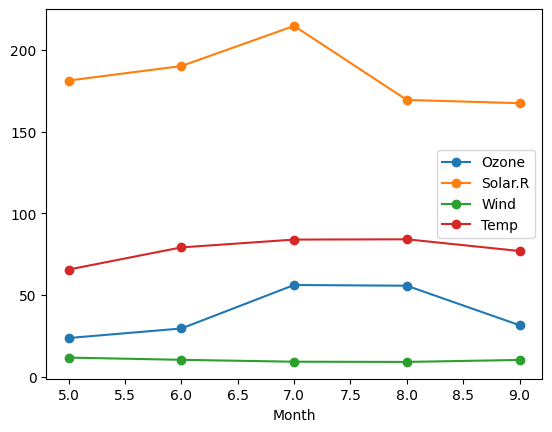

In [ ]:
#선그래프
result.plot(marker='o')
plt.show()

실전분석_문제2)
사원(emp) 데이터셋과 부서(dept) 데이터셋은 부서 번호(DEPTNO) 칼럼을 공유한다. 두 데이터셋을 병합하고 분석해보자

In [ ]:
emp = pd.read_csv('/emp.csv')
emp.head()

,EMPNO,ENAME,JOB,MGR,HIREDATE,SAL,COMM,DEPTNO
0,7369,SMITH,CLERK,7902.0,1980-12-17,800,NaN,20
1,7499,ALLEN,SALESMAN,7698.0,1981-02-20,1600,300.0,30
2,7521,WARD,SALESMAN,7698.0,1981-02-22,1250,500.0,30
3,7566,JONES,MANAGER,7839.0,1981-04-02,2975,NaN,20
4,7654,MARTIN,SALESMAN,7698.0,1981-08-28,1250,1400.0,30


In [ ]:
dept = pd.read_csv('/dept.csv')
dept.head()

,DEPTNO,DNAME,LOC
0,10,ACCOUNTING,NEW YORK
1,20,RESEARCH,DALLAS
2,30,SALES,CHICAGO
3,40,OPERATIONS,BOSTON
4,70,BRANCH_1,SEOUL


In [ ]:
#부서 번호 기준 병합
df = emp.merge(dept, on='DEPTNO')
df.head()

,EMPNO,ENAME,JOB,MGR,HIREDATE,SAL,COMM,DEPTNO,DNAME,LOC
0,7369,SMITH,CLERK,7902.0,1980-12-17,800,NaN,20,RESEARCH,DALLAS
1,7499,ALLEN,SALESMAN,7698.0,1981-02-20,1600,300.0,30,SALES,CHICAGO
2,7521,WARD,SALESMAN,7698.0,1981-02-22,1250,500.0,30,SALES,CHICAGO
3,7566,JONES,MANAGER,7839.0,1981-04-02,2975,NaN,20,RESEARCH,DALLAS
4,7654,MARTIN,SALESMAN,7698.0,1981-08-28,1250,1400.0,30,SALES,CHICAGO


In [ ]:
#피벗테이믈 작성
df.pivot_table(index='LOC', columns='JOB', values='SAL', aggfunc='sum')

JOB,ANALYST,CLERK,MANAGER,PRESIDENT,SALESMAN
LOC,,,,,
CHICAGO,NaN,950.0,2850.0,NaN,5600.0
DALLAS,6000.0,1900.0,2975.0,NaN,NaN
NEW YORK,NaN,1300.0,2450.0,5000.0,NaN


In [ ]:
#피벗테이믈 작성
df.pivot_table(index='DNAME', columns='JOB', values='ENAME', aggfunc='count')

JOB,ANALYST,CLERK,MANAGER,PRESIDENT,SALESMAN
DNAME,,,,,
ACCOUNTING,NaN,1.0,1.0,1.0,NaN
RESEARCH,2.0,2.0,1.0,NaN,NaN
SALES,NaN,1.0,1.0,NaN,4.0
